# ANOVA

Suppose the USGA wants to compare the mean distances associated with four different brands of golf balls when struck with a driver. A completely randomized design is employed, with Iron Byron, the USAGA’s robotic golfer, using a driver to hit a random sample of 10 balls of each brand in a random sequence. The distance is recorded for each hit, and the results are shown in the file `golfball.csv`.

sourcce : http://gchang.people.ysu.edu/SPSSE/OneWayANOVA/SPSSOANOVA.htm

In [1]:
# import libraries - pandas & visualization libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# load the dataset from golfball.csv
df = pd.read_csv('golfball.csv')

In [3]:
# head
df.head()

,Brand,Distance
0,Brand A,251.2
1,Brand A,245.1
2,Brand A,248.0
3,Brand A,251.1
4,Brand A,260.5


In [4]:
# check the number of observations in each group
df.shape

(40, 2)

In [5]:
# summary statistics of the data
df.describe().round(2)

,Distance
count,40.00
mean,257.78
std,9.55
min,242.00
25%,249.30
50%,256.45
75%,264.55
max,277.50


In [6]:
# summary statistics of the data by group
df.groupby('Brand').describe().round(2)

Distance                                                    
           count    mean   std    min     25%     50%     75%    max
Brand                                                               
Brand A     10.0  250.78  4.74  244.6  248.20  250.55  253.22  260.5
Brand B     10.0  261.06  3.87  254.5  257.90  262.85  264.02  265.0
Brand C     10.0  269.95  4.50  263.2  266.73  270.10  272.35  277.5
Brand D     10.0  249.32  5.20  242.0  246.65  248.80  250.82  261.8

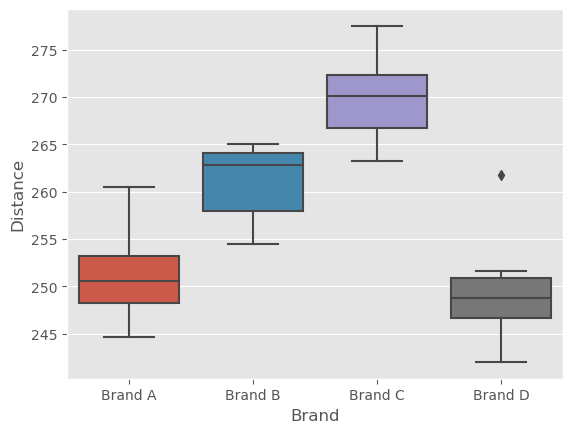

In [7]:
# visualize the distribution of distance by group using boxplot
sns.boxplot(data=df, x='Brand',y='Distance');

# One-Way Anova Hypothesis

$H_0$: All the brands mean distances are equal ($\mu_1 = \mu_2 =\mu_3 = \mu_4$)

$H_a$: Atleast one pair of mean distances are different

In [8]:
# import ols function from statsmodels and anova_lm from statsmodels.stats.anova
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [11]:
# formula string to indicate the dependent numerical variable and the independent categorical variable
formula = 'Distance ~ C(Brand)'


In [13]:
# create anova model and fit it and print the summary
model = ols(data=df,formula=formula).fit()
result = anova_lm(model)
print(result)

            df      sum_sq     mean_sq          F        PR(>F)
C(Brand)   3.0  2794.38875  931.462917  43.988746  3.973108e-12
Residual  36.0   762.30100   21.175028        NaN           NaN


In [14]:
# alternatively implement one way anova using the scipy.stats library
from scipy.stats import f_oneway

In [15]:
# one way anova
f_oneway(df[df['Brand'] == 'Brand A']['Distance'], 
            df[df['Brand'] == 'Brand B']['Distance'],
            df[df['Brand'] == 'Brand C']['Distance'],
            df[df['Brand'] == 'Brand D']['Distance'])

F_onewayResult(statistic=43.988745915327335, pvalue=3.973108389358279e-12)

# Conclusion
There is statistically significant evidence to reject the null hypothesis and accept the alternate hypothesis since the calculated probability value (pvalue) is less than alpha of 0.05